# King County Housing Characteristics

In [3]:
# Add image here of Tableau prices

Using multiple linear regression analysis models to infer the price of homes based on their existing characteristics.

**Business problem:**

King County home sales have been increasing as Seattle continues to grow. Top notch labor and a favorable climate make King County a desirable place to live and work. Our real estate team has been tasked with advising clients on the fair value of their home. When our team lists our client's homes, we want to ensure the price is accurate compared to the market.

The model also guides clients on which features to prioritize for increasing home value. This can include renovation, expanding square footage, or other suggestions within the owners control.

## Data

- 21,597 rows by 21 columns
- CSV Formatted

## Roadmap

- Scrub data to handle null values and duplicates
- Add additional features to better infer the price of home based on existing characteristics
- Check for linearity and multicollinearity to make sure that model meets relevant assumptions
- Perform outlier removal methods to better meet the assumptions of the linear regression model
- Provide accompanying visualizations to support and interpret the findings of the model
- Circle back to how the multiple linear regression model supports the recommendations for how prices can be predicted based on existing characteristics

# Scrub Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Descriptions of columns

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Quality of view
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [5]:
# Evaluating if type matches column description

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

- Date should be a datetime object
- Sqft basement should be an integer, not object

In [6]:
# Make date into datetime object

df['date'] = pd.to_datetime(df['date'])

In [7]:
# Observe summary statistics

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


- ID is a random value so should not be evaluated as a continuous variable
- Price has a large standard deviation and most likely contains outlier values
- Waterfront is a binary variable
- Floors, view, condition, and grade are discrete variables
- Zipcode, latitude, and longitude are not continuous variables


## Handling Null Values

<AxesSubplot:>

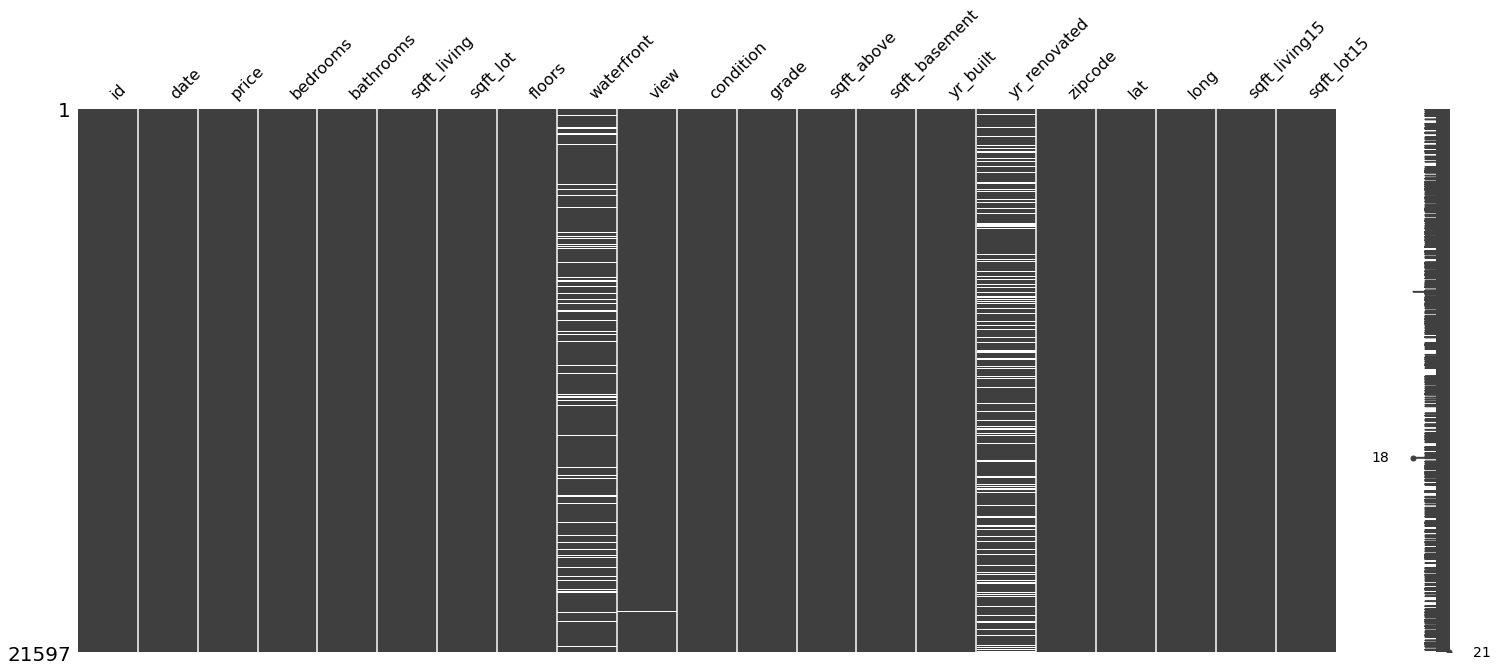

In [8]:
# Visualize which columns contain null values

import missingno
missingno.matrix(df)

Waterfront, view, and yr_renovated contain null values

In [9]:
# Check how many null values are in each column

null = df.isna().sum()
null[null>1]

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

In [10]:
def impute_cat(df, col):
    '''
    Impute null value with value based on liklihood
    of occurring in the original column
    '''
    val_prob = dict(df[col].value_counts(1))
    prob = list(val_prob.values())
    val = list(val_prob.keys())
    np.random.choice(val, p=prob)
    df[col].fillna(np.random.choice(val, p=prob), inplace=True)
    return df

### Fill in missing Values for 'view' column
Interpreting 'view' as quality of the view from the home. For example, a 4 would be a stunning view, maybe of the mountains or a lake. Can be a beautiful view of the home of nature, or the urban environmnt. A view of 1 would be described as highly undesirable, like looking directly into a neighbor's property, or an unappealing natural characteristic. 

In [11]:
print('Value Counts Normalized')
print(df['view'].value_counts(1, dropna=False))
print('------------------------')
print('Value Counts Absolute')
print(df['view'].value_counts(dropna=False))

Value Counts Normalized
0.00   0.90
2.00   0.04
3.00   0.02
1.00   0.02
4.00   0.01
nan    0.00
Name: view, dtype: float64
------------------------
Value Counts Absolute
0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
nan        63
Name: view, dtype: int64


I have gone ahead and made the assumption that a **nan** represents a value that is missing completely at random. I will use impute_cat to insert a value between 0-4 based on the probability of the original variables distribution
- 90% chance of imputing a 0
- 2% chance of imputing a 1
- 4% of imputing a 2
- 2% of imputing a 3
- 1% of imputing a 4

In [12]:
impute_cat(df, 'view')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0.00,0.00,3,8,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0.00,0.00,3,8,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0.00,0.00,3,7,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2.00,nan,0.00,3,8,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [13]:
# Confirm that there are no more null values in the view column

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fill in missing Values for 'yr_renovated' column
Describes when the home was most recently renovated

In [14]:
print('Value Counts Normalized')
print(df['yr_renovated'].value_counts(1, dropna=False))
print('------------------------')
print('Value Counts Absolute')
print(df['yr_renovated'].value_counts(dropna=False))

Value Counts Normalized
0.00      0.79
nan       0.18
2014.00   0.00
2003.00   0.00
2013.00   0.00
          ... 
1944.00   0.00
1948.00   0.00
1976.00   0.00
1934.00   0.00
1953.00   0.00
Name: yr_renovated, Length: 71, dtype: float64
------------------------
Value Counts Absolute
0.00       17011
nan         3842
2014.00       73
2003.00       31
2013.00       31
           ...  
1944.00        1
1948.00        1
1976.00        1
1934.00        1
1953.00        1
Name: yr_renovated, Length: 71, dtype: int64


Most of the values in yr_renovated are either 0 or nan

In [15]:
df[df['yr_renovated']>0].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,744.00,744.00,744.00,744.00,744.00,744.00,744.00,652.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00
mean,4418716401.67,768901.89,3.46,2.31,2327.38,16215.53,1.50,0.04,0.60,3.22,7.75,1878.72,1939.46,1995.93,98095.62,47.58,-122.26,1988.88,13390.77
std,2908265353.00,627125.79,1.07,0.90,1089.00,38235.31,0.49,0.21,1.21,0.52,1.20,849.44,22.09,15.60,54.86,0.12,0.13,715.44,26213.65
min,3600057.00,110000.00,1.00,0.75,520.00,1024.00,1.00,0.00,0.00,1.00,4.00,520.00,1900.00,1934.00,98001.00,47.20,-122.50,828.00,1281.00
25%,1922984893.00,412250.00,3.00,1.75,1560.00,5000.00,1.00,0.00,0.00,3.00,7.00,1267.50,1921.00,1987.00,98040.00,47.52,-122.36,1460.00,5000.00
50%,3899100167.50,607502.00,3.00,2.25,2200.00,7375.00,1.50,0.00,0.00,3.00,8.00,1730.00,1941.50,2000.00,98112.00,47.60,-122.29,1850.00,7455.00
75%,7014200237.50,900000.00,4.00,2.75,2872.50,12670.75,2.00,0.00,0.00,3.00,8.00,2300.00,1955.00,2007.25,98126.00,47.67,-122.21,2380.00,10925.75
max,9829200250.00,7700000.00,11.00,8.00,12050.00,478288.00,3.00,1.00,4.00,5.00,13.00,8570.00,2003.00,2015.00,98199.00,47.78,-121.36,5500.00,310582.00


The most recent renovation took place in 2015. The oldest recorded renovation was in 1934

In [16]:
# Going to assume that a null value means that the home has never been renovated
# This is equivalent to a 0 which is why I am filling null values with 0

df['yr_renovated'].fillna(0, inplace=True)

In [17]:
# Confirm that there are no more null values in the yr_renovated column

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fill in missing Values for 'waterfront' column
Waterfront is a binary variable. 1 means the home has a view of the water. 0 means the home does not have a view of the water
- Based on national home prices, waterfront properties tend to be more expensive than non-waterfront homes. People appreciate the view of the ocean, or a lake, and enjoy easy access to bodies of water especially during the summer
- I'd like to explore if homes prices at greater than $1,000,000 are more likely to have a waterfront view
- I can then use this finding to subset the data based on a home prices threshold and impute the missing waterfront variables with more accuracy

In [18]:
# Check if mean of price is greater for homes with waterfront views

df.groupby('waterfront')[['price', 'view']].mean()

,price,view
waterfront,,
0.00,532641.99,0.20
1.00,1717214.73,3.76


As expected, waterfront homes have a greater mean price than non-waterfront homes. Their view score is also much higher because the proximity to water. It is easier to see the ocean, lake, or river which enhances the view score as it is a desirable natural feature

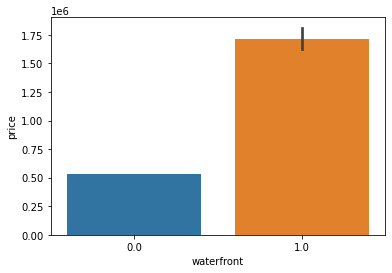

In [19]:
import seaborn as sns

sns.barplot(data=df, x='waterfront', y='price', ci=68);

Clearly, waterfront homes are more expensive than non-waterfront homes

In [20]:
mplus_water =len(df[(df['price']>1000000) & df['waterfront']==1.0])
print(f'Number of houses over $1,000,000 with waterfront view:\t{mplus_water}')
mminus_water = len(df[(df['price']<1000000) & df['waterfront']==1.0])
print(f'Number of houses under $1,000,000 with waterfront view:\t{mminus_water}')

Number of houses over $1,000,000 with waterfront view:	96
Number of houses under $1,000,000 with waterfront view:	49


In [21]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

print('$1M+ with waterfront');
print(df.loc[df['price']>1000000]['waterfront'].value_counts(1));
print('------------------------------------------')
# Prob of having waterfront view for homes under $1,000,000
print('$1M- with waterfront');
print(df.loc[df['price']<1000000]['waterfront'].value_counts(1))

$1M+ with waterfront
0.00000   0.92666
1.00000   0.07334
Name: waterfront, dtype: float64
------------------------------------------
$1M- with waterfront
0.00000   0.99726
1.00000   0.00274
Name: waterfront, dtype: float64


- 7.3% of homes priced over \$1 million have waterfront views
- 0.02% of homes priced under \$1 million have waterfront views
- As a result, I am going to subset the data by a \$1 million threshold limit and then impute the missing variables. The reason I am doing this is because the more expensive homes are far more likely to have waterfront views and I don't want them to have the same probability of being assigned a waterfront view. 

In [22]:
# Subset the data into two slices based on $1 million threshold

df_1mplus=df.loc[df['price']>1000000]
df_1mminus=df.loc[df['price']<1000000]

In [23]:
# Use impute_cat on homes over $1,000,000

df_1mplus =impute_cat(df_1mplus, 'waterfront')

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [24]:
# Simply fill the missing waterfront values with 0 for homes under $1,000,000 because the
# probability of them having a waterfront view is far lower

df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)

<ipython-input-24-3a74373b56b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)


In [25]:
# Join the data back together

df=pd.concat([df_1mminus, df_1mplus])

In [26]:
# Confirm there are no more missing values

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Missing values are handled, next step is to address duplicate values

## Handling Duplicates

In [27]:
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Initially, it appears that we don't have any duplicates in the dataset. However, df.duplicated() only returns duplicate values if **all** columns in the row are matching. It may be produnt to check if there are any duplicates that appear in the 'id' column

In [28]:
# Check duplicats by 'id'
display(len(df))
df[df.duplicated(subset=['id'],keep=False)]


21565

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.00000,3,1.50000,1580,5000,1.00000,0.00000,0.00000,3,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
94,6021501535,2014-12-23,700000.00000,3,1.50000,1580,5000,1.00000,0.00000,0.00000,3,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
324,7520000520,2014-09-05,232000.00000,2,1.00000,1240,12092,1.00000,0.00000,0.00000,3,6,960,280.0,1922,1984.00000,98146,47.49570,-122.35200,1820,7460
325,7520000520,2015-03-11,240500.00000,2,1.00000,1240,12092,1.00000,0.00000,0.00000,3,6,960,280.0,1922,1984.00000,98146,47.49570,-122.35200,1820,7460
345,3969300030,2014-07-23,165000.00000,4,1.00000,1000,7134,1.00000,0.00000,0.00000,3,6,1000,0.0,1943,0.00000,98178,47.48970,-122.24000,1020,7138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14294,3528000040,2014-10-01,1690000.00000,3,3.25000,5290,224442,2.00000,0.00000,0.00000,4,11,4540,750.0,1988,0.00000,98053,47.66710,-122.05100,3750,84936
14295,3528000040,2015-03-26,1800000.00000,3,3.25000,5290,224442,2.00000,0.00000,0.00000,4,11,4540,750.0,1988,0.00000,98053,47.66710,-122.05100,3750,84936
15999,5536100020,2015-05-12,1190000.00000,3,2.00000,2160,15788,1.00000,0.00000,0.00000,3,8,2160,0.0,1951,0.00000,98004,47.62270,-122.20700,2260,9787
18976,7856400300,2014-07-02,1410000.00000,2,2.50000,3180,9400,2.00000,0.00000,4.00000,5,10,2610,570.0,1985,0.00000,98006,47.56170,-122.15800,3760,9450


Here, we see that when we check for duplicates by 'id' we do have duplicate rows. The only difference between the first and last duplicate row is date and price. This leads me to believe that the duplicate is shown because there was a sale. As a result, I am only going to keep the 'last' value because I want to reflect the most recent change of value and accurate price.

In [29]:
df=df.drop_duplicates(subset=['id'], keep='last')
print(len(df))

21388


Our dataset went from 21,565 observations to 21,388. We removed 177 duplicate  values. 

In [30]:
# Confirm that there are no more duplicate observations in the dataset

df.duplicated(subset=['id'],keep=False).sum()

0

# Exploratory Data Analysis

- Explore the distribution of each variable and their relationship with price
- Determine if variables are discrete or continuious
- Determine if variables are categoric or numeric
- Check if their skew in the distribution or normal
- Check if their are outlier values and if they appear above the median or below the median

In [31]:
def distr_(df, col):
    """
    Produces a boxplot, scatterplot, and histogram/kde
    Produces summary statistics
    """
    fig, ax = plt.subplots(figsize=(8,7), nrows=3, gridspec_kw={'height_ratios': [2,1,4]});
    mean=df[col].mean()
    median=df[col].median()
    max_=df[col].max()
    min_=df[col].min()
    std_=df[col].std()
    sns.histplot(df[col],alpha=0.5,stat='density',ax=ax[0]);
    sns.kdeplot(df[col],color='green',ax=ax[0]);
    ax[0].set_xlabel(col)
    ax[0].set_title(f'{col} Distribution')
    ax[0].axvline(mean, label=f'Mean: {mean}', c='red')
    ax[0].axvline(median, label=f'median: {median}', c='red', linestyle=':')
    ax[0].legend()
    
    sns.boxplot(data=df, x=col, ax=ax[1]);
    
    sns.scatterplot(data=df, x=df[col], y=df['price']);
    
    fig.tight_layout();
    print(f'{col.capitalize()} Summary')
    print(f'Median: {median}')
    print(f'Mean: {mean:.4}')
    print(f'Max: {max_}')
    print(f'Min: {min_}')
    print(f'Std: {std_:.4}')
    plt.show()

## Handling Error in Basement encoding

When initially running the EDA check, sqft_basement throws an eror so going to further inspect what is causing the error

In [32]:
# Check values

df['sqft_basement'].value_counts(0)

0.0       12701
?           452
600.0       215
500.0       205
700.0       205
          ...  
2190.0        1
20.0          1
2130.0        1
1920.0        1
588.0         1
Name: sqft_basement, Length: 304, dtype: int64

452 values have a question mark. I am going to assume that a question mark means the data is missing. Since the question mark only represents ~2% of the data, changing it to 0 will not alter the original distribution of the data. Additionally, since there are a high number of 0 values ~59% of the data, I am going to turn sqft_basement into a binary variable. 0 for no basement, 1 for basement is present. Otherwise, the standard deviation will be very large and it will be difficult to interpret

In [33]:
# Replace the question mark with a zero

df['sqft_basement'].replace(to_replace='?', value='0.0',inplace=True)

In [34]:
df['sqft_basement'].value_counts(1)

0.0      0.61497
600.0    0.01005
500.0    0.00958
700.0    0.00958
800.0    0.00940
           ...  
2190.0   0.00005
20.0     0.00005
2130.0   0.00005
1920.0   0.00005
588.0    0.00005
Name: sqft_basement, Length: 303, dtype: float64

Question mark is gone. 61% of homes do not have a basement

In [35]:
# Use .map to make sqft_basement into a binary variable

df['basementyes'] = (df['sqft_basement']>'0.0').map({True:1,
                                                      False: 0})

In [36]:
# Confirm that original sqft_basement and new column have equal distribution of 0 and 1 variables

df['basementyes'].value_counts(1)

0   0.61497
1   0.38503
Name: basementyes, dtype: float64

In [37]:
# Drop sqft_basement because we are replacing it with a binary reprsentation (either a home has a basement
# or it does not)

df=df.drop('sqft_basement', axis=1)

## Return to checking distributions, outliers, and relationship with price

Price Summary
Median: 450000.0
Mean: 5.412e+05
Max: 7700000.0
Min: 78000.0
Std: 3.674e+05


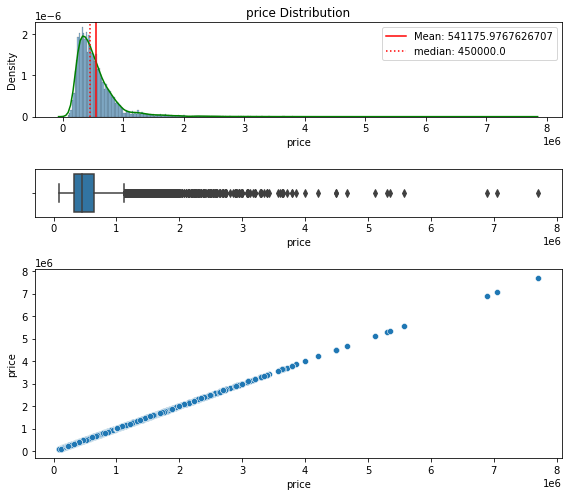

None
---------------------------------------------------------------------------------------
Bedrooms Summary
Median: 3.0
Mean: 3.373
Max: 33
Min: 1
Std: 0.9252


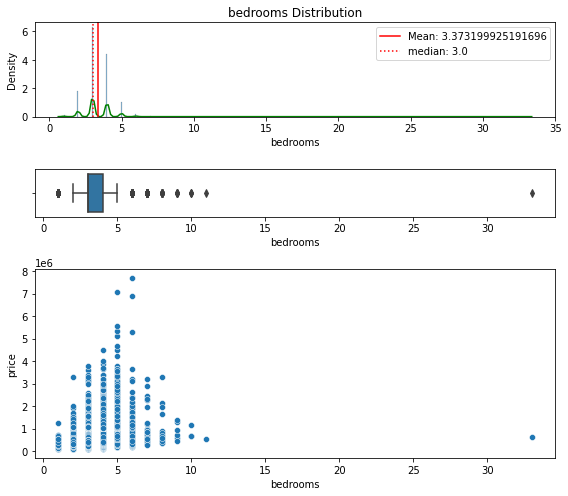

None
---------------------------------------------------------------------------------------
Bathrooms Summary
Median: 2.25
Mean: 2.118
Max: 8.0
Min: 0.5
Std: 0.7685


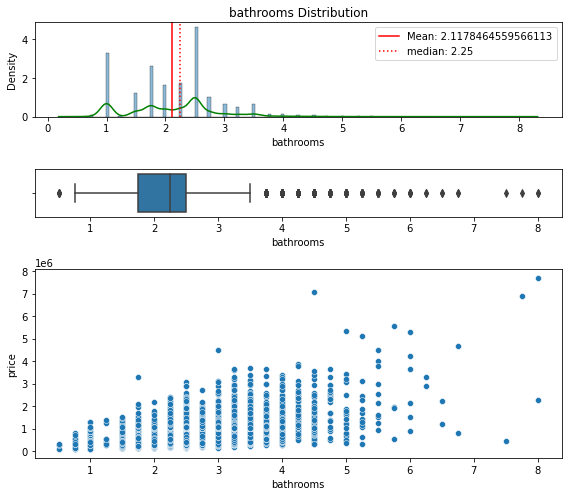

None
---------------------------------------------------------------------------------------
Sqft_living Summary
Median: 1920.0
Mean: 2.082e+03
Max: 13540
Min: 370
Std: 918.7


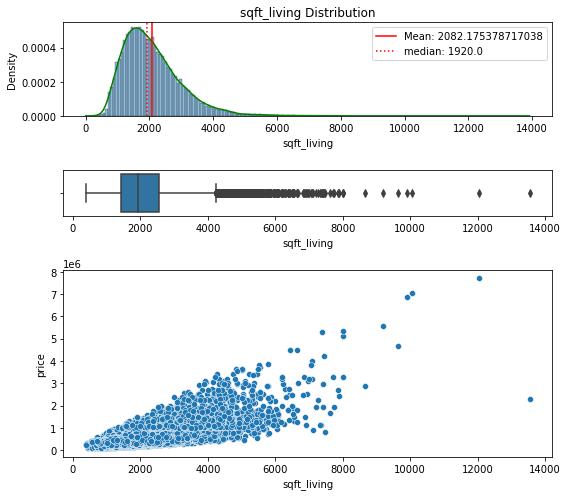

None
---------------------------------------------------------------------------------------
Sqft_lot Summary
Median: 7610.0
Mean: 1.513e+04
Max: 1651359
Min: 520
Std: 4.156e+04


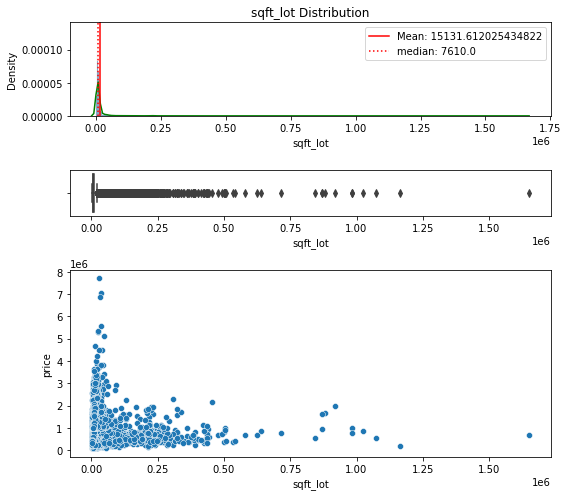

None
---------------------------------------------------------------------------------------
Floors Summary
Median: 1.5
Mean: 1.496
Max: 3.5
Min: 1.0
Std: 0.54


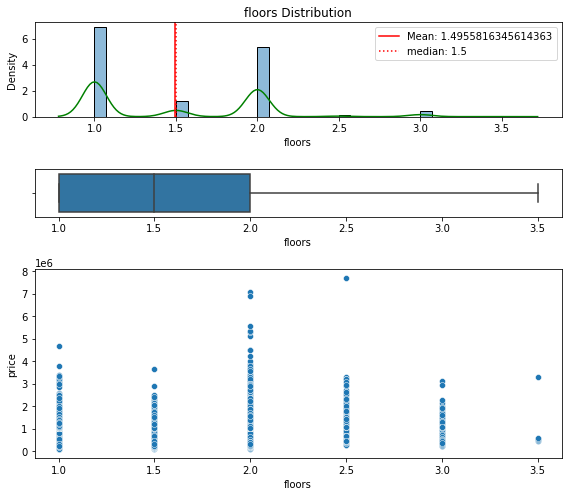

None
---------------------------------------------------------------------------------------
Waterfront Summary
Median: 0.0
Mean: 0.00678
Max: 1.0
Min: 0.0
Std: 0.08206


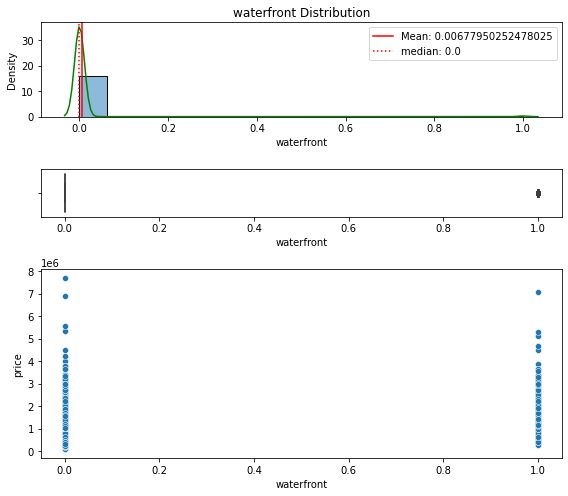

None
---------------------------------------------------------------------------------------
View Summary
Median: 0.0
Mean: 0.2332
Max: 4.0
Min: 0.0
Std: 0.7639


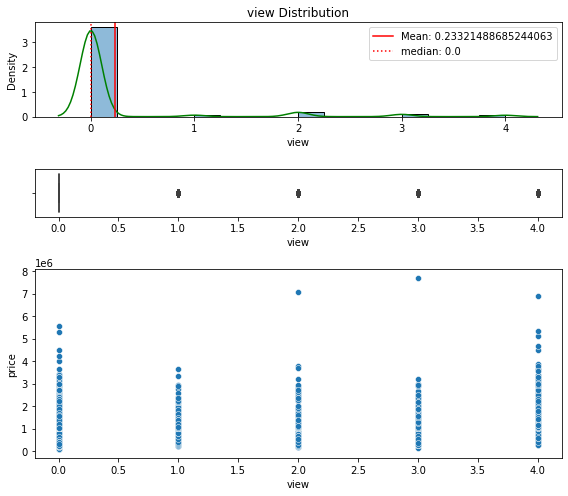

None
---------------------------------------------------------------------------------------
Condition Summary
Median: 3.0
Mean: 3.41
Max: 5
Min: 1
Std: 0.6496


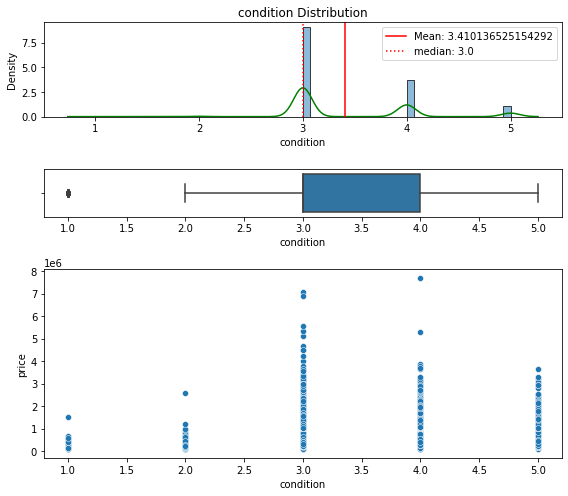

None
---------------------------------------------------------------------------------------
Grade Summary
Median: 7.0
Mean: 7.661
Max: 13
Min: 3
Std: 1.171


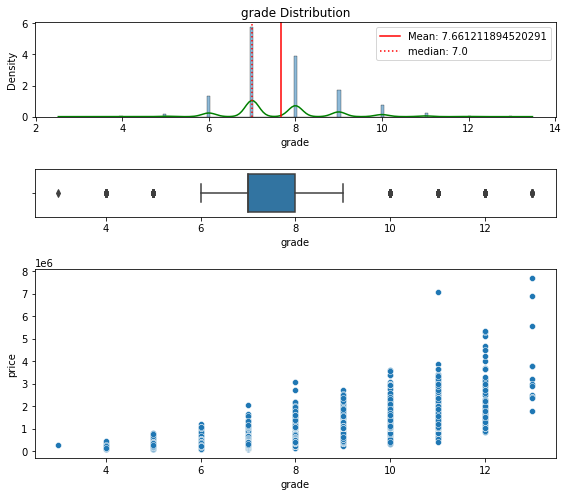

None
---------------------------------------------------------------------------------------
Sqft_above Summary
Median: 1560.0
Mean: 1.79e+03
Max: 9410
Min: 370
Std: 828.6


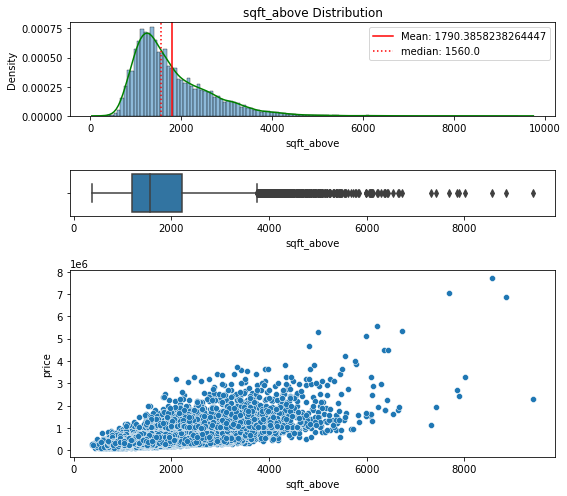

None
---------------------------------------------------------------------------------------
Yr_built Summary
Median: 1975.0
Mean: 1.971e+03
Max: 2015
Min: 1900
Std: 29.37


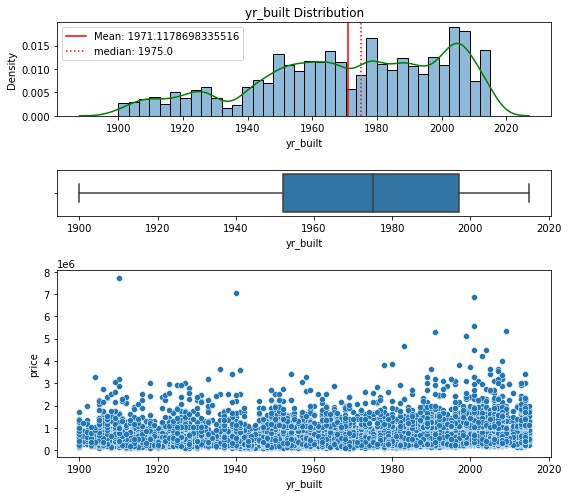

None
---------------------------------------------------------------------------------------
Yr_renovated Summary
Median: 0.0
Mean: 68.88
Max: 2015.0
Min: 0.0
Std: 364.3


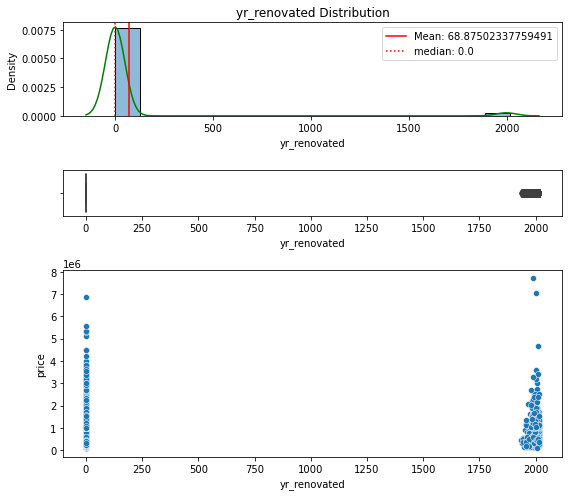

None
---------------------------------------------------------------------------------------
Zipcode Summary
Median: 98065.0
Mean: 9.808e+04
Max: 98199
Min: 98001
Std: 53.48


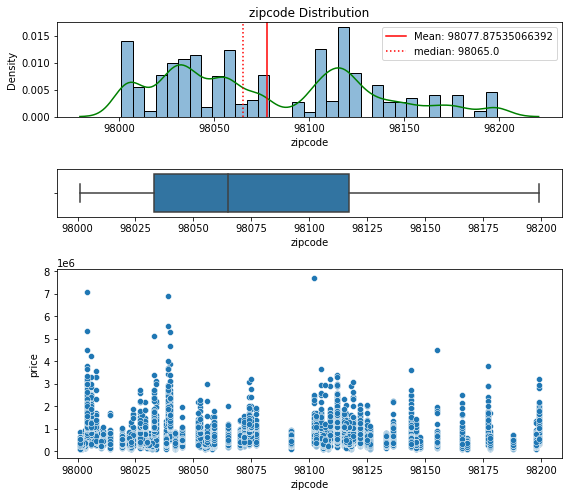

None
---------------------------------------------------------------------------------------
Lat Summary
Median: 47.5719
Mean: 47.56
Max: 47.7776
Min: 47.1559
Std: 0.1386


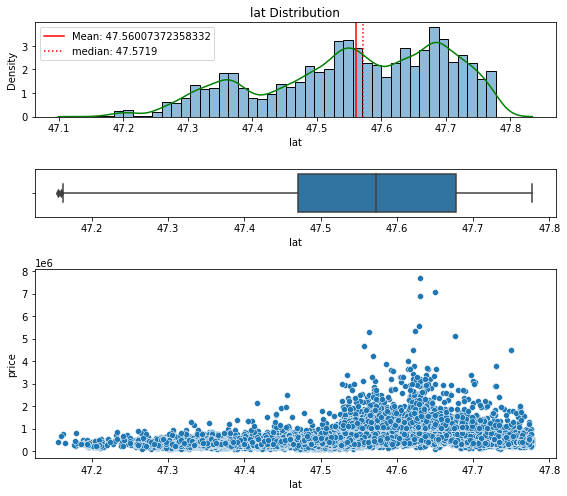

None
---------------------------------------------------------------------------------------
Long Summary
Median: -122.23
Mean: -122.2
Max: -121.315
Min: -122.51899999999999
Std: 0.1408


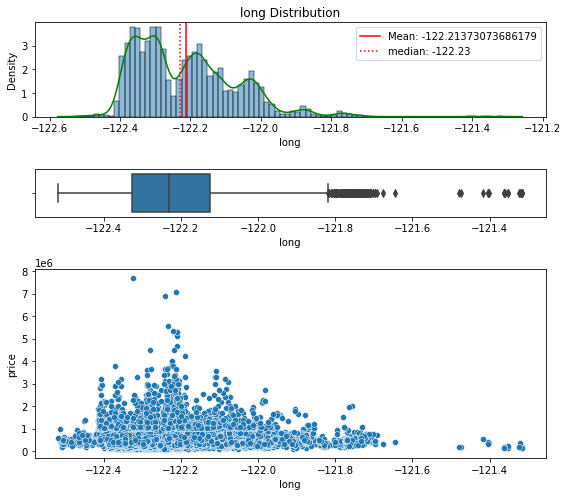

None
---------------------------------------------------------------------------------------
Sqft_living15 Summary
Median: 1840.0
Mean: 1.988e+03
Max: 6210
Min: 399
Std: 685.4


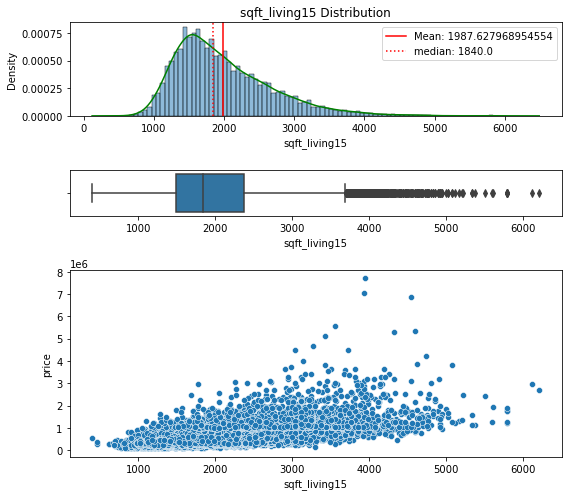

None
---------------------------------------------------------------------------------------
Sqft_lot15 Summary
Median: 7620.0
Mean: 1.278e+04
Max: 871200
Min: 651
Std: 2.736e+04


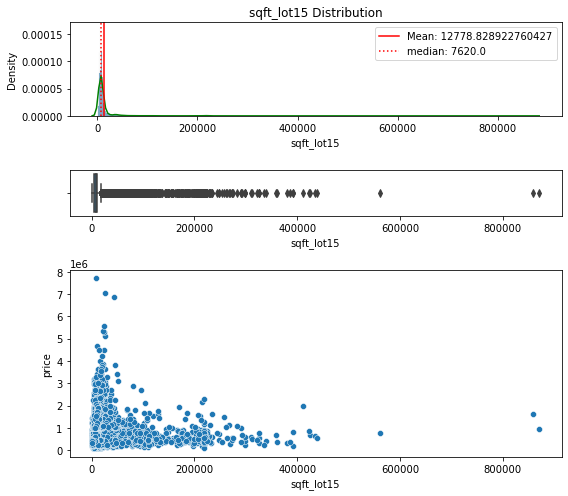

None
---------------------------------------------------------------------------------------
Basementyes Summary
Median: 0.0
Mean: 0.385
Max: 1
Min: 0
Std: 0.4866


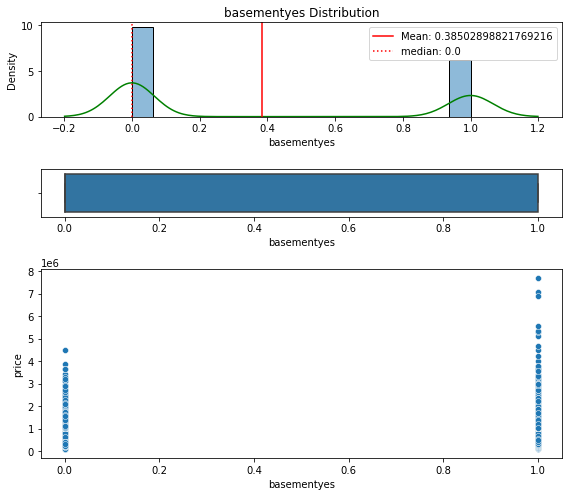

None
---------------------------------------------------------------------------------------


In [38]:
# Checking all variables except for id, zipcode, latitude, and longitude

eda_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basementyes']
for col in eda_check:
    print(distr_(df, col))
    print('---------------------------------------------------------------------------------------')

### Individual EDA Analysis

1. Price
    1. **Distribution**: Binomial, Right skewed
    2. **Outliers**: Outliers upper IQR threshold
    3. **Relationship with price**: NA
    
2. Bedrooms
    1. **Distribution**: Bimodal
    2. **Outliers**: Outliers upper IQR threshold. Extreme outlier at 33 that should most likely be removed
    3. **Relationship with price**: Linear until 5/6 bedrooms
    4. **Discrete or Continuous**: Discrete-Possibly ordinal
    
3. Bathrooms
    1. **Distribution**: Bimodal
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Discrete-Ordinal

4. Sqft_living
    1. **Distribution**: Bimodal, skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Continuous

5. Sqft_lot
    1. **Distribution**: Binomial, Right skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Non-Linear
    4. **Discrete or Continuous**: Continuous

6. Floors
    1. **Distribution**: Bimodal, Right skewed
    2. **Outliers**: None
    3. **Relationship with price**: Non-Linear-Non Ordinal
    4. **Discrete or Continuous**: Discrete

7. Waterfront
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: Unclear
    4. **Discrete or Continuous**: Discrete - Binary

8. View
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: Unclear
    4. **Discrete or Continuous**: Discrete

9. Condition
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: Unclear. Seems to increase until 3 and then move down
    4. **Discrete or Continuous**: Discrete

10. Grade
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Discrete

11. Sqft_above
    1. **Distribution**: Right skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Continuous
 
12. Yr_Built
    1. **Distribution**: Left skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: None
    4. **Discrete or Continuous**: Continuous
    
13. Yr_Renovated
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: None
    4. **Discrete or Continuous**: Continuous
    
14. Sqft_living15
    1. **Distribution**: Right skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Continuous
    
15. Sqft_lot15
    1. **Distribution**: Right skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Continuous

15. Basementyes
    1. **Distribution**: Binary
    2. **Outliers**: None
    3. **Relationship with price**: Unclear
    4. **Discrete or Continuous**: Discrete-Binary

### Overall EDA Analysis

- Most of the continuous variables are right skeweed
- Supported by the distribution and mean being greater than the median
- High outlier values on the upper IQR threshold
- Yr_renovated has a lot of 0 values so may be improved by turning into a binary variable
- Bedrooms has a mistaken entry (33 bedrooms)

#### Handle Bedroom error

In [39]:
# Find the observation where bedroom is 33

df[df['bedrooms']>20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes
15856,2402100895,2014-06-25,640000.00000,33,1.75000,1620,6000,1.00000,0.00000,0.00000,5,7,1040,1947,0.00000,98103,47.68780,-122.33100,1330,4700,1


Appears to be a mistake because there is only 1.75 bathrooms and sqft living is only 1620. Going to drop column

In [40]:
df.drop(index=15856, inplace=True)

In [41]:
# Confirm it has been removed

df[df['bedrooms']>20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes


### Turn yr_renovated into binary values
- High amount of zero values, binary encoding will be a better indicator of relationship with price
- Otherwise, the standard deviation will be very high and it will be difficult to effectively interpret

In [42]:
df['yr_renovated'].value_counts(1)

0.00000      0.96549
2014.00000   0.00341
2003.00000   0.00145
2013.00000   0.00145
2007.00000   0.00140
               ...  
1934.00000   0.00005
1971.00000   0.00005
1954.00000   0.00005
1950.00000   0.00005
1944.00000   0.00005
Name: yr_renovated, Length: 70, dtype: float64

Aprox. 97% of values suggest the home has not been renovated. Safe to encode as has been renovated or has not been renovated

In [43]:
df['renovated_yes'] = (df['yr_renovated']>0).map({True:1,
                                                   False: 0})


In [44]:
# Confirm distribution has not changed

df['renovated_yes'].value_counts(1)

0   0.96549
1   0.03451
Name: renovated_yes, dtype: float64

In [45]:
# Dropping yr_renovated because we are replacing it with a binary variable

df.drop('yr_renovated', axis=1, inplace=True)

# Feature Engineering

- Explore adding additional predictor values to the model so that it can more accurately predict price
- Feature engineering allows for us to broaden our predictor values then what we are limited to with the original dataset
- Be cautious of multicollinearity because features will be engineering by transforming existing columns

## Total Rooms
- Add bedrooms and bathrooms to create new column called total_rooms
- This will provide us a summary of the number of rooms in the home

In [46]:
# Combine bedrooms and bathrooms

df['total_rooms'] = df['bedrooms']+df['bathrooms']

Total_rooms Summary
Median: 5.5
Mean: 5.49
Max: 16.5
Min: 1.5
Std: 1.463


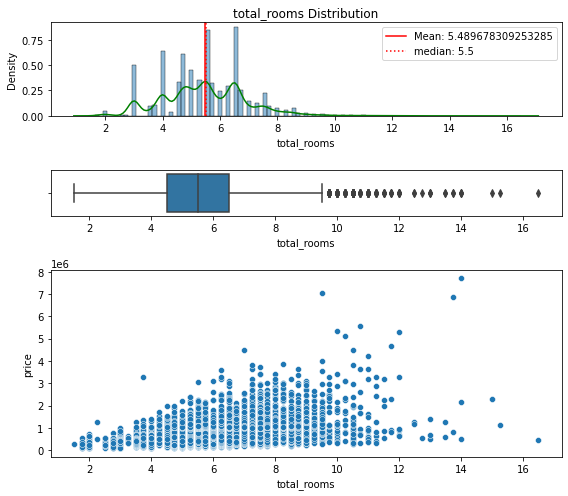

In [47]:
distr_(df, 'total_rooms')

- Distribution is not normal
- Looks like there are a significant number of outliers to the right of the upper IQR threshold
- Initially looks like there is a positive linear relationship wiht price

## Backyard Size as a proportion of the total lot
- Use sqft_above/sqft_lot as a proxy for backyard size
- Essentially, we are capturing how big the home is compared to the lot
- A larger value means a relatively smaller backyard and vice versa

In [48]:
# Divide sqft_living/sqft_lot
# Using sqft_above as opposed to sqft_living because living includes basement which we removed from our dataset

df['live_lot'] = df['sqft_above']/df['sqft_lot']

Live_lot Summary
Median: 0.20274485339987525
Mean: 0.2808
Max: 4.653846153846154
Min: 0.0006095498431482305
Std: 0.2426


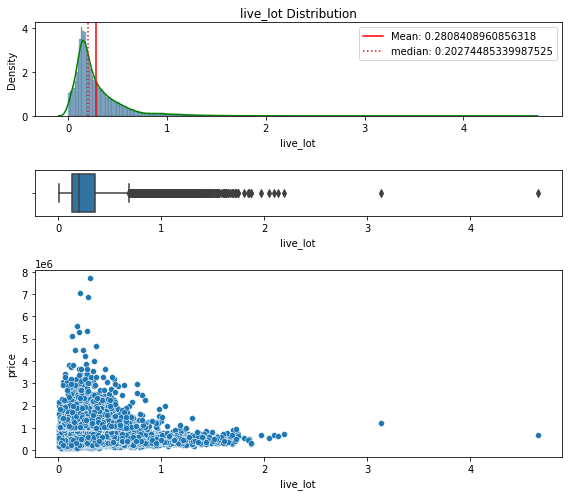

In [49]:
distr_(df, 'live_lot')

- Data is right skewed
- Significant number of outliers to the right of the upper IQR threshold
- Values may be greater than 1 because the living space can be greater than the lot space in the event that a house is built on a small lot and has many floors. In other words, it has a lot of sqft footage on the inside because it goes up vertically

## Comparison of Square Foot living and Lot vs Neighbors

- Sqft_living15 represents the average living space of the 15 nearest neighbors
- Would like to compare how the living space of the observed home compares to the neighbors

In [50]:
# SQF_living compared to neighbors
df['living_vs_neighbor'] = df['sqft_living']/df['sqft_living15']

Living_vs_neighbor Summary
Median: 1.0
Mean: 1.054
Max: 6.0
Min: 0.1872791519434629
Std: 0.3203


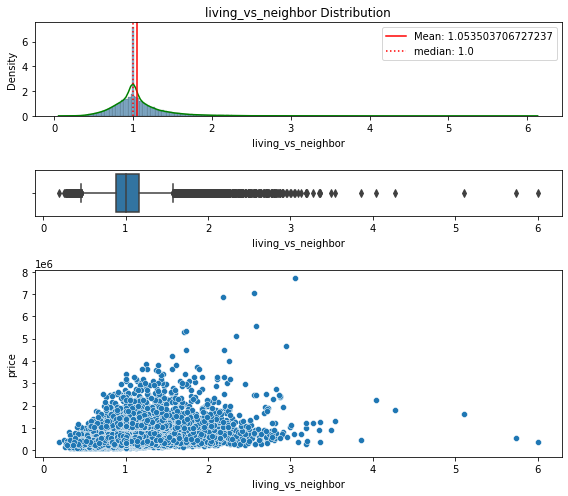

In [51]:
distr_(df, 'living_vs_neighbor')

- Data looks pretty normally distributed because mean and median are very close
- Outliers to the right of the upper threshold
- Unclear if there is a linear relationship with price
- A lot of the much larger homes in comparison to the neighbors actually have a negative relationship with price

- Sqft_lot15 represents the average living space of the 15 nearest neighbors
- Would like to compare how the lot size of the observed home compares to the neighbors

In [52]:
df['lot_vs_neighbor'] = df['sqft_lot']/df['sqft_lot15']

Lot_vs_neighbor Summary
Median: 1.0
Mean: 1.134
Max: 87.52717948717948
Min: 0.054971997700810314
Std: 1.286


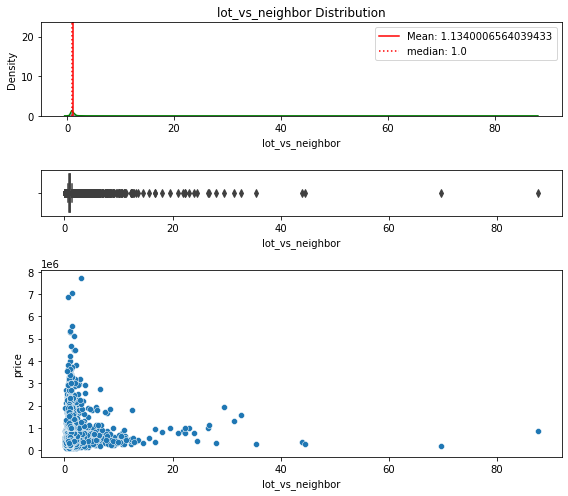

In [53]:
distr_(df, 'lot_vs_neighbor')

- Hard to tell distribution because there are clearly significant outlier values
- There are values greater than 80 which seem unreasonable unless there is a neighborhood with apartments and one extremely large home
- Linearity seems unlinkely because as lot_vs_neighbor increases, the change in price is not constant

# Check Assumptions of Linearity and Multicollinearity

- For the model to provide acccurate inferences, it must meet assumptions of linearity and multicollinearity

## Check Assumption of Linearity

- There must be a linear relationship between the predictor variable and target variable
    - In our case, the predictor variable refers to the home features and the target refers to price
- By linear relationship, we mean that as the x-value increases, the y-value must change by a constant amount
- If we do not meet assumption of linearity, our model will not accuratly infer home prices
- Must check each predictor that we are we going to include in the model

In [54]:
def lin_check(df, cols, ncols=4, figsize=(20,15)):
    """
    Produces regplot for each feature against price
    """
    if ncols%4==0:
        fig, axes = plt.subplots(nrows=(len(cols)//ncols), ncols=ncols, figsize=figsize)
        for ax, col in zip(axes.flatten(), cols):
            sns.regplot(data=df, x=col, y='price', ax=ax, line_kws={'color': 'red'})
            ax.set_title(f'{col} vs. price')
        fig.tight_layout()
    else:        
        fig, axes = plt.subplots(nrows=(len(cols)//ncols)+1, ncols=ncols, figsize=figsize)
        for ax, col in zip(axes.flatten(), cols):
            sns.regplot(data=df, x=col, y='price', ax=ax, line_kws={'color': 'red'})
            ax.set_title(f'{col} vs. price')
        fig.tight_layout()

In [55]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'basementyes', 'renovated_yes', 'total_rooms', 'live_lot',
       'living_vs_neighbor', 'lot_vs_neighbor'],
      dtype='object')

In [56]:
# Choosing to remove latitude and longitude from predictor variables because zip code 
# is a sufficient proxy for location. Additionally, for matters of interpretability, it
# will be easier for residents to understand zip code recommendations as opposed to lat/long

cols_to_check = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'zipcode','sqft_living15',
       'sqft_lot15', 'basementyes', 'renovated_yes', 'total_rooms', 'live_lot',
       'living_vs_neighbor', 'lot_vs_neighbor']

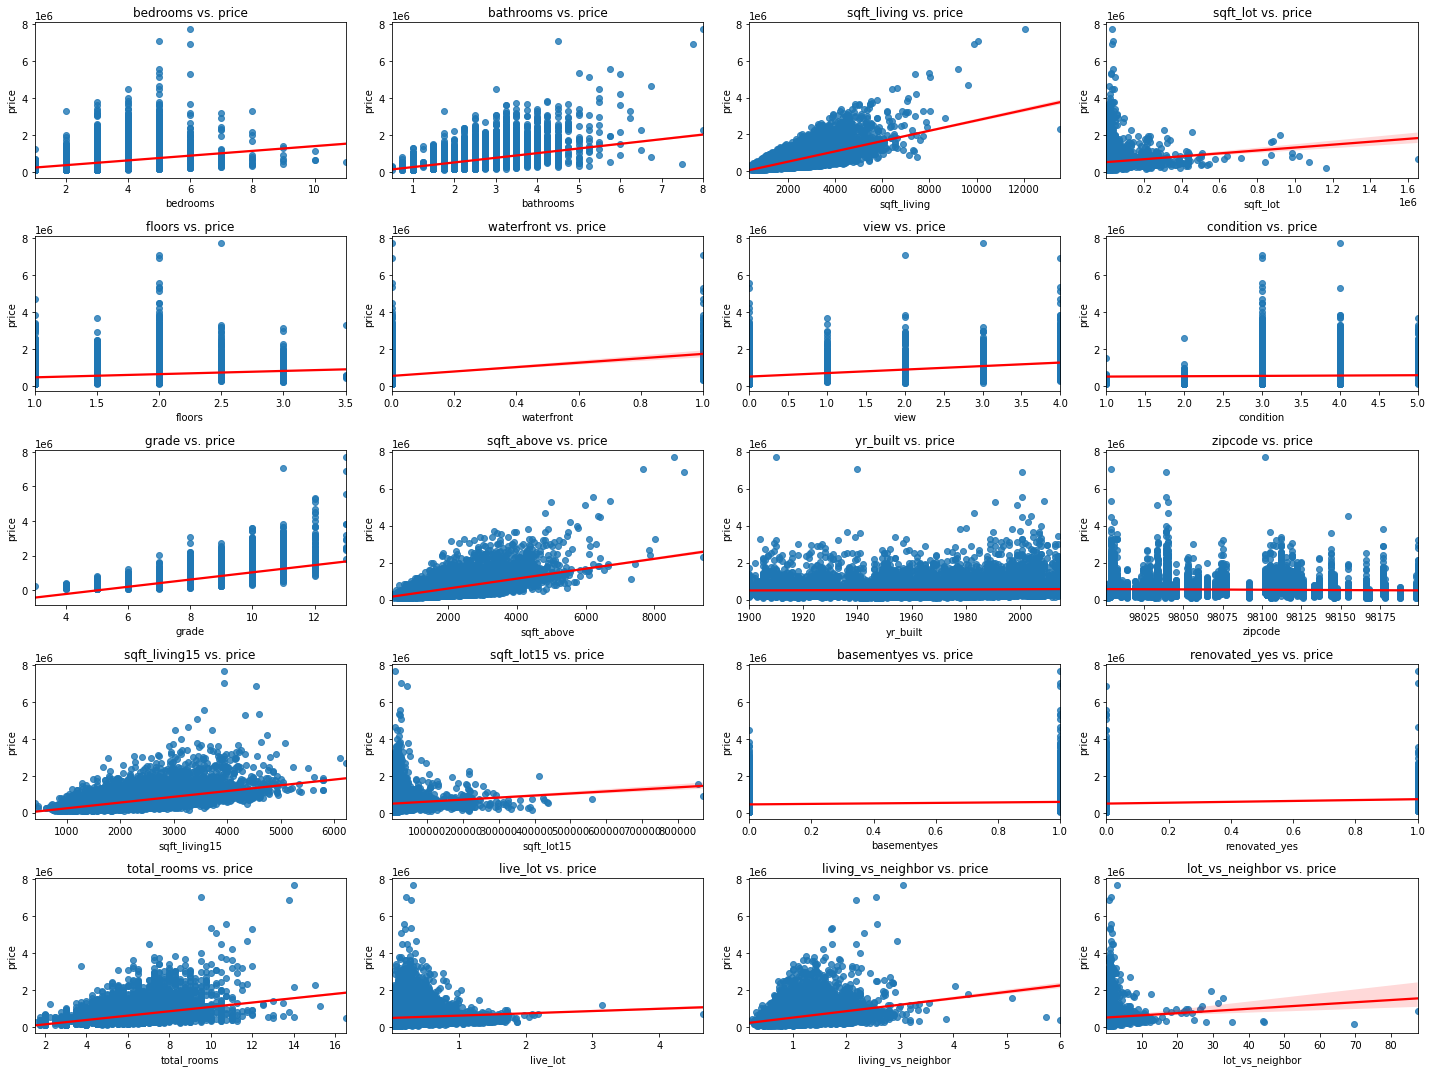

In [58]:
# Checking for linearity between predictor values and price

lin_check(df, cols_to_check)

The following cells do not have a linear relationship with price:
- Sqft_lot
- Floors (categorical)
- View (categorical)
- Condition (categorical)
- Yr_built
- Zip code (categorical)
- Basementyes (categorical)
- Renovatedyes (categorical)
- Sqft_lot15
- Live_lot

Sqft_lot, Yr_built, sqft_lot15, and live_lot are numeric variables that very clearly do not have a linear relationship with price. Of the categorical variables that do not have a linear relationship with price, will proceed by creater bar plots to evaluate their relationship with price. If there is not a clear linear relationship with price, I will One Hot Encode them

In [75]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'basementyes', 'renovated_yes', 'total_rooms', 'live_lot',
       'living_vs_neighbor', 'lot_vs_neighbor'],
      dtype='object')

In [77]:
cols_to_drop = ['sqft_lot', 'sqft_lot15', 'live_lot', 'yr_built', 'lat', 'long']
df_lin = df.drop(cols_to_drop, axis=1)

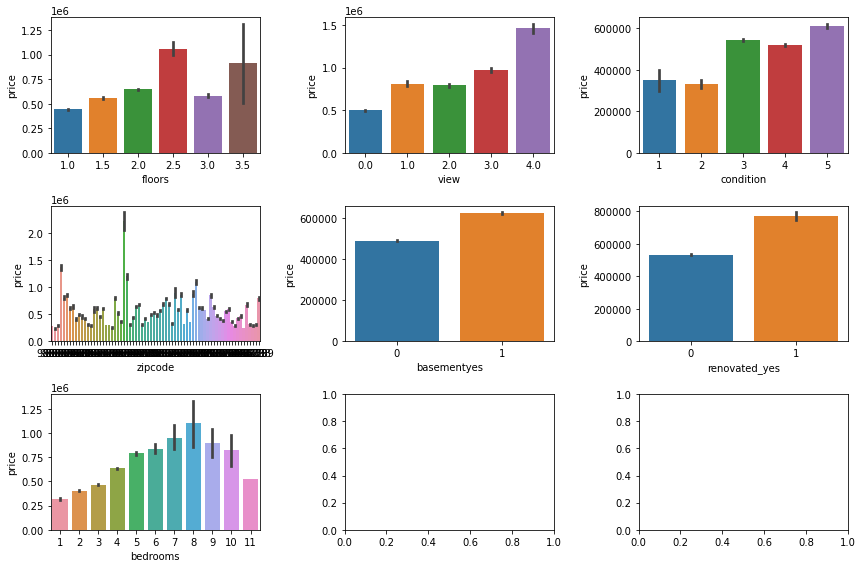

In [97]:
# Checking if categorical variables appear to have a linear relationship with price

cat_bars = ['floors', 'view', 'condition', 'zipcode', 'basementyes', 'renovated_yes', 'bedrooms']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,8))
for ax, col in zip(axes.flatten(), cat_bars):
    sns.barplot(data=df, x=col, y='price', ax=ax, ci=68)
    fig.tight_layout()
    

- Floors, and zipcode do not have linear relationships with price
- Condition is close, but roughly has a linear relationship with price
- Will turn floors, zip code, and bedrooms into OHE variables to see if they make an impact on the model

**Conclusion:**
- Will be dropping: Sqft_lot, Yr_built, sqft_lot15, and live_lot are numeric
- Will be One Hot Encoding: Floors, zipcode

## Check Assumption of Multicollinearity

For a multiple linear regression model to be accurate, it must meet the assumption that the predictor variables do not have multicollinearity. This means that not only should the predictors have a linear relationship with target, but they should not have a linear relationship with each other. In essense, if two variables move very close together, then they are redundant for inferential capabilities and may make it confusing to interpret which variable is contributing to the change in predictor values

RoadMap for checking assumptions of multicollinearity
1. Run initial check of correlation with price
2. Observe heatmap triangle to see which predictors have strong correlation with each other and price
3. Build table to show which variables have a correlation of greater than 0.75 with each other
    - 0.75 is the norm for determing if predictor values have muliticollinearity

In [79]:
# Check correlation with price

def initial_corr_check(df, col='price'):
    return df.corr()['price'].round(2).sort_values(ascending=False)

In [85]:
initial_corr_check(df_lin.drop(columns='id'))

price                 1.00000
sqft_living           0.70000
grade                 0.67000
sqft_above            0.60000
sqft_living15         0.58000
bathrooms             0.53000
total_rooms           0.47000
view                  0.39000
bedrooms              0.32000
living_vs_neighbor    0.30000
waterfront            0.27000
floors                0.25000
basementyes           0.18000
renovated_yes         0.12000
lot_vs_neighbor       0.04000
condition             0.03000
zipcode              -0.05000
Name: price, dtype: float64

Initial correlation check shows that sqft_living, grade, and sqft_above have the most positive linear relationship with price

In [86]:
# Reference: https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

def corr_triangle(df):
    """
    Correlation heatcamp, including price
    """
    corr2 = df.corr()
    fig, ax = plt.subplots(figsize=(15,15))
    matrix = np.triu(corr2)
    return sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

<AxesSubplot:>

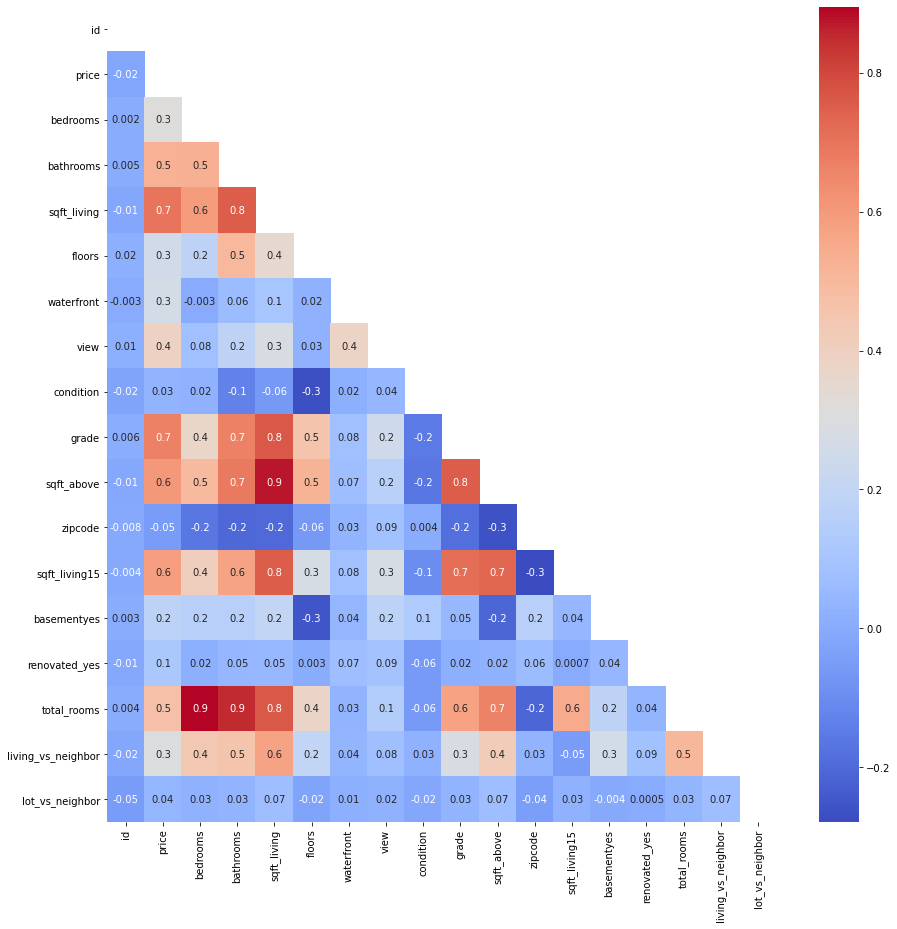

In [87]:
corr_triangle(df_lin)

There are a number of features that have strong multicollinearity. This is partially due to feature engineering and transforming existing columns to produce new columns
- Total rooms correlates strongly with bedrooms and bathrooms because that is how it was developed
- Sqft_living and sqft_living 15 are strongly correlated
- Sqft_living and sqft_above and grade are strongly correlated
    - Because sqft_living and sqft_above will be the same for homes that do not have basements

In [88]:
# Reference:https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

def corr_finder(df):
    """
    Shows pairs of features that have a correlation of greater than 0.75 with
    each other
    """
    df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
    df_corr.set_index(['pairs'], inplace = True)
    df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

    # # cc for correlation coefficient
    df_corr.columns = ['cc']
    df_corr.drop_duplicates(inplace=True)

    return df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

In [89]:
corr_finder(df_lin)

,cc
pairs,
"(bedrooms, total_rooms)",0.89510
"(sqft_living, sqft_above)",0.87655
"(total_rooms, bathrooms)",0.85186
"(total_rooms, sqft_living)",0.76392
"(grade, sqft_living)",0.76243
"(sqft_living15, sqft_living)",0.75630
"(sqft_above, grade)",0.75610
"(sqft_living, bathrooms)",0.75581


Methodology to handle collinearity:
- For each pair, drop the feature that has the lower correlation with price
    - Maintaining the feature that has a stronger relationship with price
        - Bedrooms & Total_Rooms: Drop Total Rooms because it has multicollinearity with many other features an reduces the nuance of the difference between suggesting adding either bedrooms or bathrooms
        - Sqft_living & Sqft_above: Drop Sqft_living because lower correlation with price. Additionally sqft_living included basement which we have now represented with a binary variable. Nuance of the basement is not lost
        - Total_Rooms and Bathrooms: Already eliminated Total_Rooms
        - Total_Rooms and Sqft_living: Already eliminated both features
        - Sqft_living15 and Sqft_living: Already eliminated sqft_living
        - Sqft_above and grade: Electing to keep because they represent very different features
        - Sqft_living and bathrooms: Already dropped sqft_living

In [92]:
cols_to_drop = ['total_rooms', 'sqft_living']
df_linco = df_lin.drop(cols_to_drop, axis=1)

In [95]:
# Confirm no multicollinearity issues except for sqft_above and grade
# Elected to keep because they represent very different predictions

corr_finder(df_linco)

,cc
pairs,
"(sqft_above, grade)",0.75610


Our model is now closer to meeting all the necessary assumptions to provide accurate inferences. Next steps will be to handle categorical variables with One Hot Encoding. 

# Model 1: Baseline Model
- Now that assumptions of linearity and no multicollinearity have been met, going to run a baseline OLS model
- Mainly observing R squared, Adjusted R squared, QQ Plot, and Homoskedacicity model
- Will check if certain variables are statistically insignificant based on their P-Value but will not be dropping variables because we have not yet handled outliers

What is R^2, Adjusted R^2, QQ Plot, and Homoskedacicity?

    - R^2: Indicated how much variance in the dependent variable is explained by the independent variable. This is our 'goodness of fit' test. The higher the value (between 0-1), the better our model does at explaining the variance of the dependent model
    
    - Adjusted R^2: Similar to R squared however it accounts for the number of independent variables. In other words, it has a downward biance as the number of independent variables increases.
    
    - Homoskedacicity: For our model to be accurate, it must meet the assumption of homoskedacicity. This means that our residuals (actual value-predicted value) cannot deviate accross different independent variables. The variance shuld not have a recognizable pattern
    
    - QQ Plot: Helps us measure homoskedacicity. Want to see the dots follow the 45 degree line. Shows us where the variance becomes non-uniform
    
    
    
    
    
Ref: https://statisticsbyjim.com/regression/interpret-r-squared-regression/

In [98]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

In [100]:
def model_summary(df, X_targets, y, qq=True):
    '''
    Produces OLS Linear Regression summary. True/False toggles if the QQ
    plot is displayed below the summary
    '''
    outcome = y
    x_cols = X_targets
    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=df).fit()
    resid1 = model.resid
    display(model.summary())
    if qq==True:
        
        sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True);
    
    return model

In [99]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


def sked_show(df, X_cols, lr=None, val='price'):
    '''
    Produces scatter plot showing measue of homoskedacicity
    '''
    if lr is None:
        lr = LinearRegression()
        lr.fit(df[X_cols], df[val])

        y_hat = lr.predict(df[X_cols])
    else:
        y_hat = lr.predict(df)

    
    resid = (df[val] - y_hat)
    fig, ax= plt.subplots(figsize=(5,5))
    ax.scatter(x=y_hat,y=resid, alpha=0.1)
    ax.axhline(0, color='red')
    ax.set_xlabel('Price')
    ax.set_ylabel('Residual')
    return fig,ax

In [102]:
# Begin by using all columns as predictor values. Establishing a baseline model to then further iterate on

x_targs = ['bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'zipcode', 'sqft_living15',
       'basementyes', 'renovated_yes', 'living_vs_neighbor',
       'lot_vs_neighbor']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2310.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:00:42   Log-Likelihood:            -2.9455e+05
No. Observations:               21387   AIC:                         5.891e+05
Df Residuals:                   21372   BIC:                         5.892e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.942e+07   3.17e+06    -15.588      0.000   -5.56e+07   -4.32e+07
bedrooms           -2.207e+04   2307.895     -9.565      0.000   -2.66e+04   -1.76e+04
bathrooms           9191.6765   3565.308      2.578      0.010    2203.406    1.62e+04
floors             -2.892e+04   3978.566     -7.268      0.000   -3.67e+04   -2.11e+04
waterfront          6.215e+05    2.1e+04     29.649      0.000     5.8e+05    6.63e+05
view                6.161e+04   2419.120     25.469      0.000    5.69e+04    6.64e+04
condition           6.613e+04   2576.450     25.666      0.000    6.11e+04    7.12e+04
grade               1.067e+05   2412.841     44.229      0.000    1.02e+05    1.11e+05
sqft_above           162.1884      6.268     25.877      0.000     149.903     174.474
zipcode              495.2092     32.314     15.325      0.000     431.872     558.546
sqft_living15         39.3824      6.576      5.989      0.000      26.493      52.271
basementyes         1.272e+05   5282.987     24.086      0.000    1.17e+05    1.38e+05
renovated_yes       1.571e+05   8800.369     17.846      0.000     1.4e+05    1.74e+05
living_vs_neighbor  9261.0622   1.07e+04      0.867      0.386   -1.17e+04    3.02e+04
lot_vs_neighbor      699.1692   1242.921      0.563      0.574   -1737.049    3135.387
==============================================================================
Omnibus:                    16907.226   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1310888.627
Skew:                           3.243   Prob(JB):                         0.00
Kurtosis:                      40.802   Cond. No.                     1.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

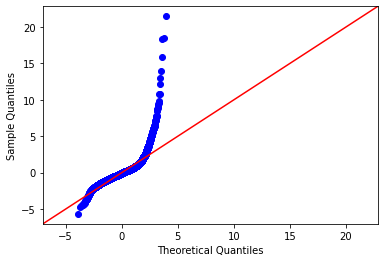

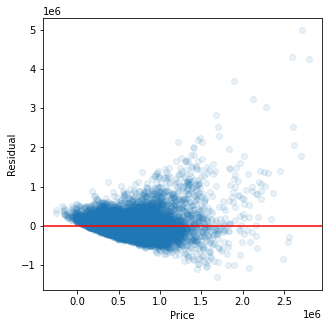

In [104]:
model_base = model_summary(df_linco, x_targs, 'price')
sked_show(df, x_targs, model_base)

**Conclusions**
- R^2: 0.602
- Adjusted R^2: 0.602
- QQ Plot: Deviates upwards at the 2nd/3rd quantile. Suggests we have high outlier values that the model is failing to explain
- Homoskedacicity: Becomes coem shaped aournd $1.25 million. Suggests outlier values
- Non-Statistically Significant Preditors: Living_vs_neighbor, lot_vs_neighbor

# Handling Categorical Variables with One Hot Encoding
- Dummy variables (one hot encoded variables) must be used to handle categorical variables because otherwise we will run into problems of multicollinearity. In other words, one of the dummy variables will be dropped because it can be explained by all of the others
- Our next step is to One Hot Encode the ordinal variables in our model
- These variables, when evaluated from an ordinal perpsetive, did not have a linear relationship with price
- However, we will evaluate their P-Values to determine if they have statistical significance as categorical variables
    - Majority of OHE variables must be statistically significant

## Check relationship of Non-Linear Categorical Variables with Price

In [106]:
def ordinal_check(df, col, val='price'):
    """
    Produces stripplot and barplot to see if there is a linear relationship between
    the feature and price
    """
    fig, axes = plt.subplots(ncols=2, figsize=(20,6))
    sns.stripplot(data=df, x=col, y=val, ax=axes[0])
    sns.barplot(data=df, x=col, y=val, ax=axes[1], ci=68)

    fig.suptitle(f'Z-{col.upper()} vs. Price')
    plt.show()
    print('------------------------------------------------------------')
    print(df[col].value_counts(1))

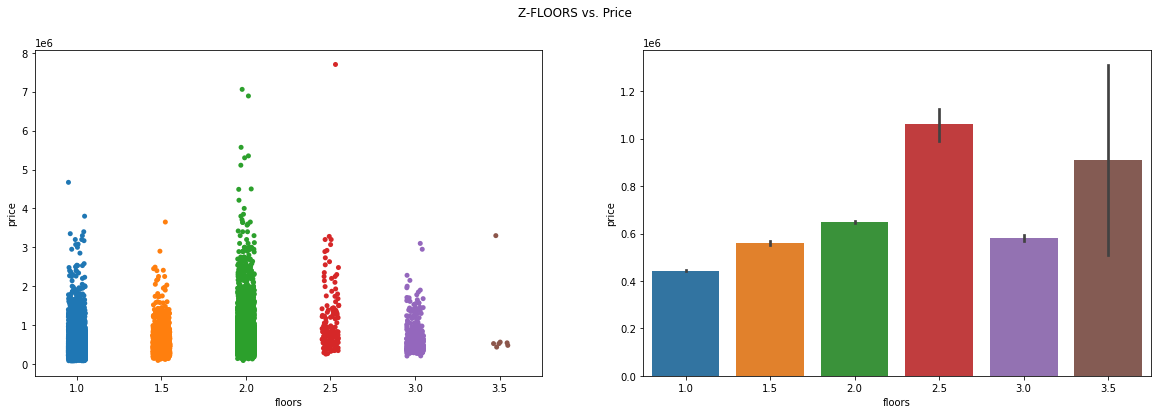

------------------------------------------------------------
1.00000   0.49306
2.00000   0.38276
1.50000   0.08795
3.00000   0.02838
2.50000   0.00753
3.50000   0.00033
Name: floors, dtype: float64


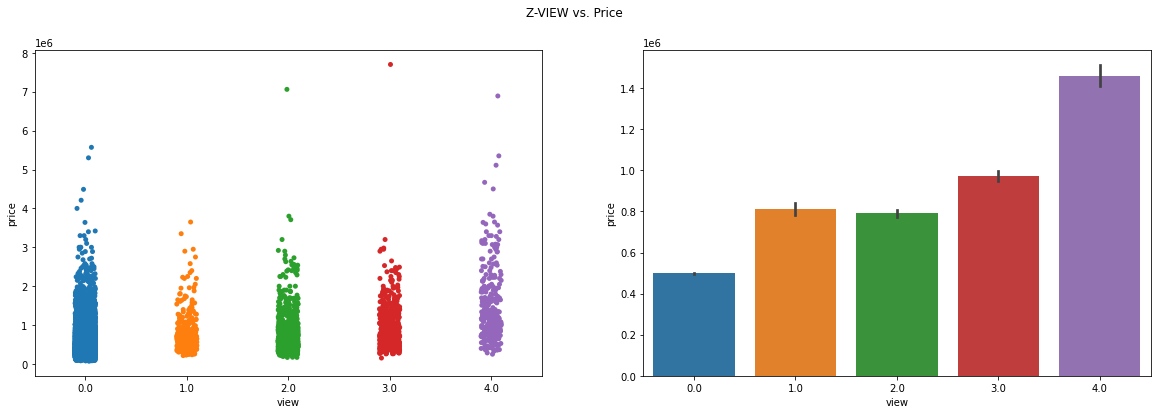

------------------------------------------------------------
0.00000   0.90204
2.00000   0.04456
3.00000   0.02361
1.00000   0.01529
4.00000   0.01449
Name: view, dtype: float64


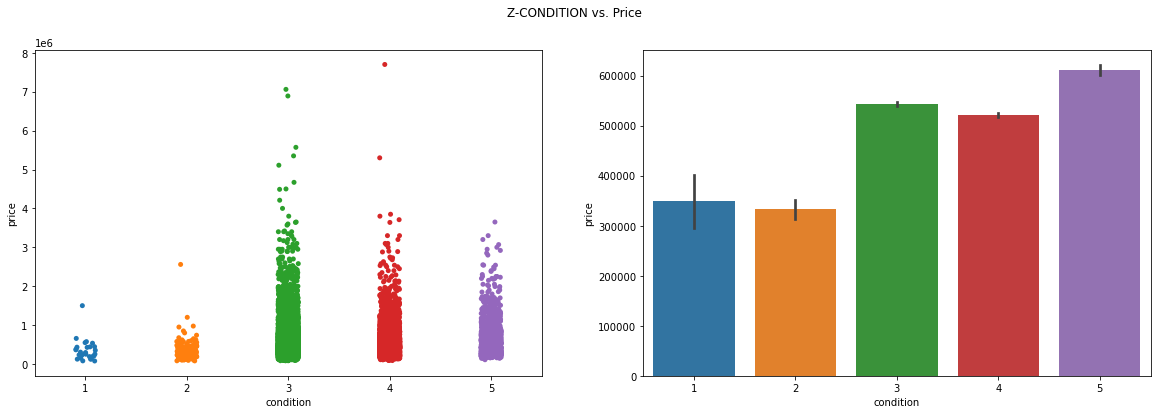

------------------------------------------------------------
3   0.64932
4   0.26334
5   0.07846
2   0.00757
1   0.00131
Name: condition, dtype: float64


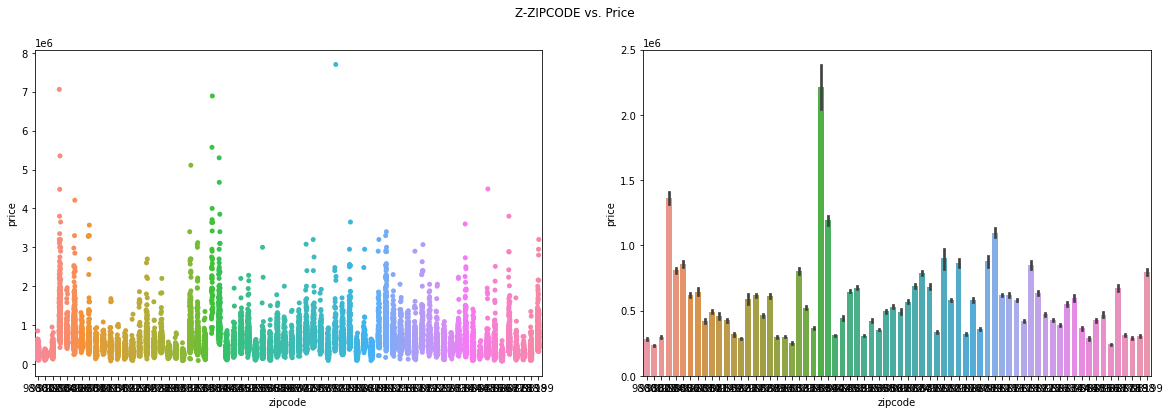

------------------------------------------------------------
98103   0.02777
98038   0.02740
98115   0.02689
98052   0.02665
98117   0.02562
          ...  
98102   0.00486
98010   0.00463
98024   0.00369
98148   0.00262
98039   0.00224
Name: zipcode, Length: 70, dtype: float64


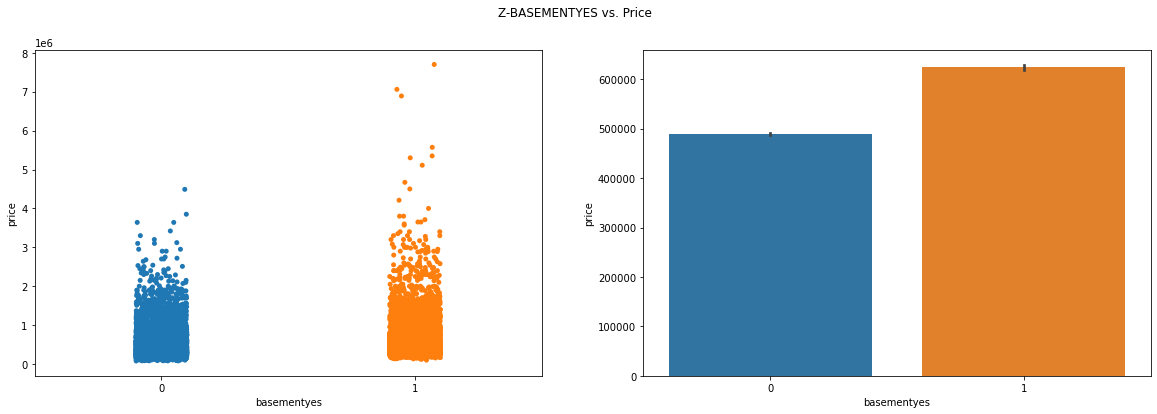

------------------------------------------------------------
0   0.61500
1   0.38500
Name: basementyes, dtype: float64


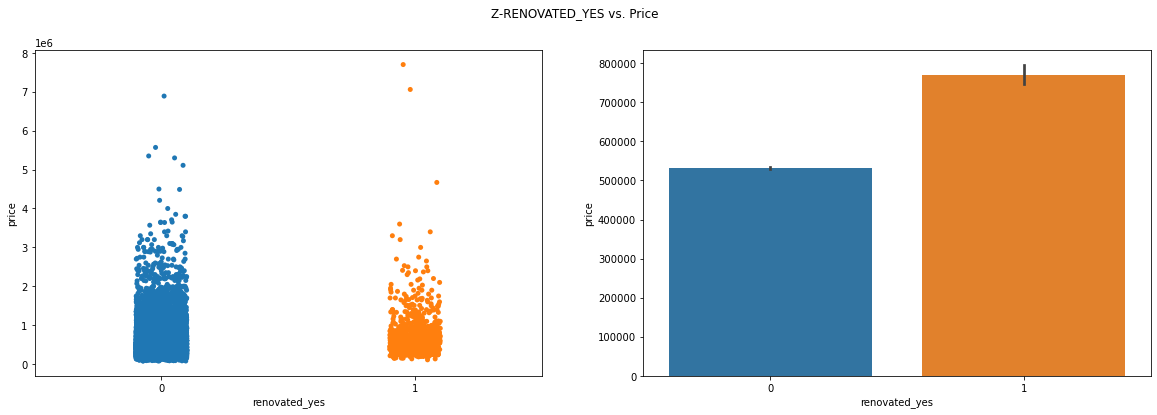

------------------------------------------------------------
0   0.96549
1   0.03451
Name: renovated_yes, dtype: float64


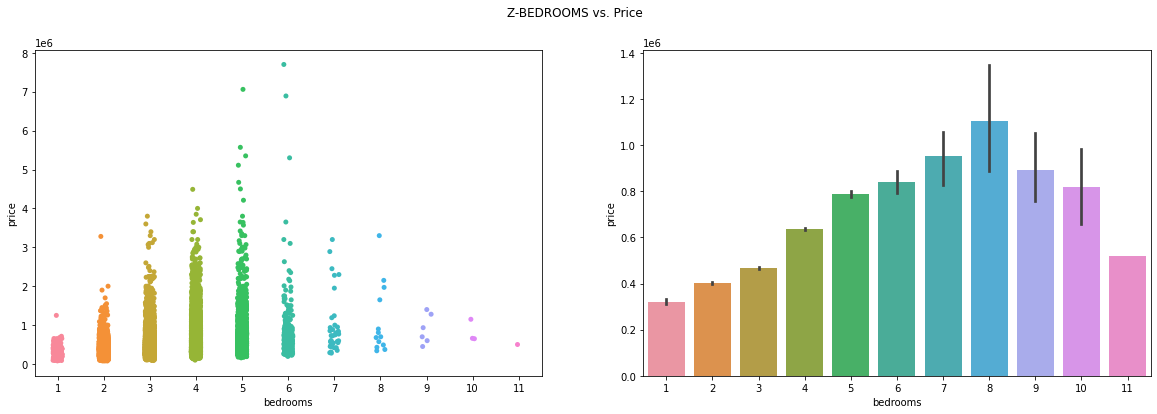

------------------------------------------------------------
3    0.45448
4    0.31968
2    0.12788
5    0.07383
6    0.01234
1    0.00893
7    0.00178
8    0.00061
9    0.00028
10   0.00014
11   0.00005
Name: bedrooms, dtype: float64


In [108]:
# Based on our findings in our linearity check we are going to inspect the following columns:

cat_bars = ['floors', 'view', 'condition', 'zipcode', 'basementyes', 'renovated_yes', 'bedrooms']
for col in cat_bars:
    ordinal_check(df_linco, col)

Based on the results we are going to One Hot Encode the following variables: 
- Floors
- Zipcode
- Bedrooms
- Condition

This is because they do not appear ordinal. In other words, as the value of the independent variable increases, the price does not change at a constant rate. Check if they are statistically significant

## One Hot Encode Categorical Non-Ordinal Columns

In [110]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

OneHotEncoder(drop='first', sparse=False)

In [111]:
# Seperate the columns we are going to OHE

cat_cols=['floors', 'zipcode', 'bedrooms', 'condition']

In [113]:
# Fit and transform categorical columns
# Turn matrix into DataFrame

encoder.fit(df_linco[cat_cols])

ohe_vars = encoder.transform(df_linco[cat_cols])
encoder.get_feature_names(cat_cols)
cat_vars = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(cat_cols))

In [114]:
# Confirm variables are OHE

cat_vars

,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,condition_2,condition_3,condition_4,condition_5
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.

In [115]:
# OLS Formula does not accept '.' so must replace these with '_'

name_dict = {}
for col in cat_vars.columns:
    name_dict[col]=col.replace('.','_')
name_dict

{'floors_1.5': 'floors_1_5',
 'floors_2.0': 'floors_2_0',
 'floors_2.5': 'floors_2_5',
 'floors_3.0': 'floors_3_0',
 'floors_3.5': 'floors_3_5',
 'zipcode_98002': 'zipcode_98002',
 'zipcode_98003': 'zipcode_98003',
 'zipcode_98004': 'zipcode_98004',
 'zipcode_98005': 'zipcode_98005',
 'zipcode_98006': 'zipcode_98006',
 'zipcode_98007': 'zipcode_98007',
 'zipcode_98008': 'zipcode_98008',
 'zipcode_98010': 'zipcode_98010',
 'zipcode_98011': 'zipcode_98011',
 'zipcode_98014': 'zipcode_98014',
 'zipcode_98019': 'zipcode_98019',
 'zipcode_98022': 'zipcode_98022',
 'zipcode_98023': 'zipcode_98023',
 'zipcode_98024': 'zipcode_98024',
 'zipcode_98027': 'zipcode_98027',
 'zipcode_98028': 'zipcode_98028',
 'zipcode_98029': 'zipcode_98029',
 'zipcode_98030': 'zipcode_98030',
 'zipcode_98031': 'zipcode_98031',
 'zipcode_98032': 'zipcode_98032',
 'zipcode_98033': 'zipcode_98033',
 'zipcode_98034': 'zipcode_98034',
 'zipcode_98038': 'zipcode_98038',
 'zipcode_98039': 'zipcode_98039',
 'zipcode_98040

In [116]:
# Rename cat_vars DF with new names so it can be processed by OLS formula

cat_vars.rename(columns=name_dict, inplace=True)
cat_vars

,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,condition_2,condition_3,condition_4,condition_5
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.

In [118]:
# Join OHE DF back with original Df

df_ohe = pd.concat([df_linco, cat_vars], axis=1)

In [120]:
# Check to ensure that concat was done on the proper axis

df_ohe.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,condition_2,condition_3,condition_4,condition_5
0,7129300520.00000,2014-10-13,221900.00000,3.00000,1.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1180.00000,98178.00000,1340.00000,0.00000,0.00000,0.88060,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,6414100192.00000,2014-12-09,538000.00000,3.00000,2.25000,2.00000,0.00000,0.00000,3.00000,7.00000,2170.00000,98125.00000,1690.00000,1.00000,1.00000,1.52071,0.94803,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,5631500400.00000,2015-02-25,180000.00000,2.00000,1.00000,1.00000,0.00000,0.00000,3.00000,6.00000,770.00000,98028.00000,2720.00000,0.00000,0.00000,0.28309,1.24039,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,2487200875.00000,2014-12-09,604000.00000,4.0

We now have a new DF called df_ohe that includes non-linear categorical variable as one hot encoded variables. This way, our model will be better meet assumptions of no multicollinearity, and all independent variables having a linear relationship with price. Important to drop original non OHE variables from DataFrame so they are not double counted

In [122]:
# Drop non-OHE variables so they are not double counted

cols_to_drop = ['floors', 'zipcode', 'bedrooms', 'condition']
df_ohe.drop(cols_to_drop, axis=1, inplace=True)

In [125]:
# Confirm non-OHE variables have been dropped

df_ohe.head()

,id,date,price,bathrooms,waterfront,view,grade,sqft_above,sqft_living15,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,condition_2,condition_3,condition_4,condition_5
0,7129300520.00000,2014-10-13,221900.00000,1.00000,0.00000,0.00000,7.00000,1180.00000,1340.00000,0.00000,0.00000,0.88060,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,6414100192.00000,2014-12-09,538000.00000,2.25000,0.00000,0.00000,7.00000,2170.00000,1690.00000,1.00000,1.00000,1.52071,0.94803,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,5631500400.00000,2015-02-25,180000.00000,1.00000,0.00000,0.00000,6.00000,770.00000,2720.00000,0.00000,0.00000,0.28309,1.24039,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,2487200875.00000,2014-12-09,604000.00000,3.00000,0.00000,0.00000,7.00000,1050.00000,1360.00000,1.00000,0.00000,1.44118,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0

# Outlier Removal: IQR + Z-Score
- Next steps are to remove outliers
- Will try using Z-Score and IQR method
- Will evaluate data loss to determine which methodology I will pursue for modeling purposes

## IQR Method
- The IQR method uses quantiles to determine if a value is considered an outlier
- The process:
    1. Determine IQR which is calcuated as Quantile 3 - Quantile 1
    2. Upper Thresh: Quantile 3 * 1.5 *IQR
    3. Lower Thresh: Quantile 1 * 1.5 * -IQR
    4. Any values outside of the upper and lower thresholds are considered outlier values

- This method is more strict for evaluating outliers than Z-Score

## IQR Method Accross All Columns
- In this approach, we are going to classify outlier observations as those with at least one outlier accross all features
- For example, if an observation is has bedrooms which are an outlier, it will be removed from the dataset
- This method is more strict for determining outliers
- CAUTION: we may have significant ata loss

# Model 2: OHE Variables

- Going to run a model to check how our accuracy and assumptions are met now that we have OHE the non-linear categorical variables
- Ensure the majority of OHE variables are statistically insignificant
    - If they are not, either drop the variable, or feature engineer to add nuance

In [140]:
x_targs = df_ohe.columns
x_targs = list(x_targs)
x_targs = [x for x in x_targs if x not in ('id', 'date', 'price')]

In [ ]:
# Confirm we have the list of target variables that we want
x_targs

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     300.9
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:43:24   Log-Likelihood:            -2.9210e+05
No. Observations:               21178   AIC:                         5.844e+05
Df Residuals:                   21079   BIC:                         5.852e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.207e+05   5.16e+04    -12.020      0.000   -7.22e+05    -5.2e+05
bathrooms          -1.721e+04   3375.837     -5.097      0.000   -2.38e+04   -1.06e+04
waterfront          6.182e+05   2.15e+04     28.696      0.000    5.76e+05     6.6e+05
view                7.153e+04   2453.523     29.153      0.000    6.67e+04    7.63e+04
grade               1.043e+05   2420.196     43.108      0.000    9.96e+04    1.09e+05
sqft_above           138.5480      6.296     22.007      0.000     126.208     150.888
sqft_living15         42.1460      6.372      6.615      0.000      29.657      54.635
basementyes         1.408e+05   5364.498     26.250      0.000     1.3e+05    1.51e+05
renovated_yes        1.49e+05   8986.855     16.576      0.000    1.31e+05    1.67e+05
living_vs_neighbor  2.722e+04   1.04e+04      2.620      0.009    6856.096    4.76e+04
lot_vs_neighbor      300.6807   1269.562      0.237      0.813   -2187.759    2789.120
floors_1_5          1171.3177   6294.789      0.186      0.852   -1.12e+04    1.35e+04
floors_2_0         -3289.2254   4102.902     -0.802      0.423   -1.13e+04    4752.776
floors_2_5          3976.1518   1.93e+04      0.206      0.837   -3.39e+04    4.18e+04
floors_3_0         -6359.0451   1.07e+04     -0.592      0.554   -2.74e+04    1.47e+04
floors_3_5         -1.009e+05   9.03e+04     -1.117      0.264   -2.78e+05    7.62e+04
zipcode_98002      -1.245e+04   2.12e+04     -0.588      0.557    -5.4e+04    2.91e+04
zipcode_98003       7852.9131   1.91e+04      0.411      0.681   -2.96e+04    4.53e+04
zipcode_98004       -2.66e+04   1.85e+04     -1.435      0.151   -6.29e+04    9735.555
zipcode_98005       1.734e+04   2.25e+04      0.771      0.441   -2.68e+04    6.14e+04
zipcode_98006      -5536.4201   1.67e+04     -0.332      0.740   -3.82e+04    2.71e+04
zipcode_98007       1.371e+04    2.4e+04      0.570      0.568   -3.34e+04    6.08e+04
zipcode_98008       -736.6687    1.9e+04     -0.039      0.969    -3.8e+04    3.65e+04
zipcode_98010      -4.533e+04   2.72e+04     -1.667      0.096   -9.86e+04    7975.297
zipcode_98011      -1.273e+04   2.13e+04     -0.597      0.550   -5.45e+04     2.9e+04
zipcode_98014      -2.056e+04   2.52e+04     -0.817      0.414   -6.99e+04    2.88e+04
zipcode_98019      -3051.5250   2.14e+04     -0.142      0.887   -4.51e+04     3.9e+04
zipcode_98022      -1.365e+04   2.01e+04     -0.679      0.497    -5.3e+04    2.58e+04
zipcode_98023      -2.672e+04   1.65e+04     -1.616      0.106   -5.91e+04    5698.226
zipcode_98024       3.189e+04   2.95e+04      1.080      0.280    -2.6e+04    8.97e+04
zipcode_98027       2062.4788   1.72e+04      0.120      0.905   -3.17e+04    3.58e+04
zipcode_98028       2.557e+04    1.9e+04      1.348      0.178   -1.16e+04    6.28e+04
zipcode_98029       2773.5241   1.84e+

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

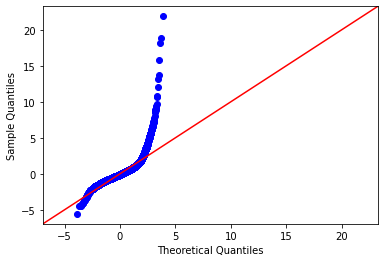

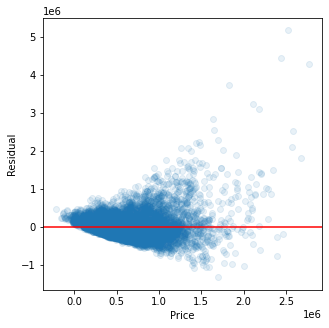

In [142]:
model_ohe = model_summary(df_ohe, x_targs, 'price')
sked_show(df_ohe, x_targs, model_ohe)